In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('USA_Housing.csv')

data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [5]:
data.shape

(5000, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
data.describe(include='object')

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


# Data Cleaning 

# Handling Missing Data

In [11]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [12]:
data.isna().sum().sort_values(ascending=False)/len(data)*100


Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

In [14]:
data.shape

(5000, 7)

In [15]:
data.duplicated().sum()


0

# Checking Unique data

In [16]:
data.nunique()


Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [19]:
data.Price.unique()

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [23]:
def attribute_info(df_feature):
 
 print('Description of feature: ', '\n')
 print(df_feature.describe(), '\n')
 
 print('Value Counts of feature: ', '\n')
 print(df_feature.value_counts(), '\n')
 
 print('Unique Values of feature: ', '\n')
 print(df_feature.unique(), '\n')
 
 print('Missing Values of feature: ', '\n')
 print(df_feature.isna().sum(), '\n')
 
 print('Missing Values of feature in %: ', '\n')
 print(df_feature.isna().sum()/len(df_feature)*100, '\n')

for col in data:
 print('\033[1m' + 'Attribute_Name: ', col+'\033[0m')
 attribute_info(data[col])
 print('---------------------------------------------------------------')


Attribute_Name:  Avg. Area Income
Description of feature:  

count      5000.000000
mean      68583.108984
std       10657.991214
min       17796.631190
25%       61480.562388
50%       68804.286404
75%       75783.338666
max      107701.748378
Name: Avg. Area Income, dtype: float64 

Value Counts of feature:  

Avg. Area Income
79545.458574    1
68735.436608    1
71635.473101    1
73211.136245    1
86249.993070    1
               ..
66064.532823    1
59390.346824    1
64661.930276    1
73279.030904    1
65510.581804    1
Name: count, Length: 5000, dtype: int64 

Unique Values of feature:  

[79545.45857432 79248.64245483 61287.06717866 ... 63390.6868855
 68001.33123509 65510.58180367] 

Missing Values of feature:  

0 

Missing Values of feature in %:  

0.0 

---------------------------------------------------------------
Attribute_Name:  Avg. Area House Age
Description of feature:  

count    5000.000000
mean        5.977222
std         0.991456
min         2.644304
25%         5.3

In [24]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


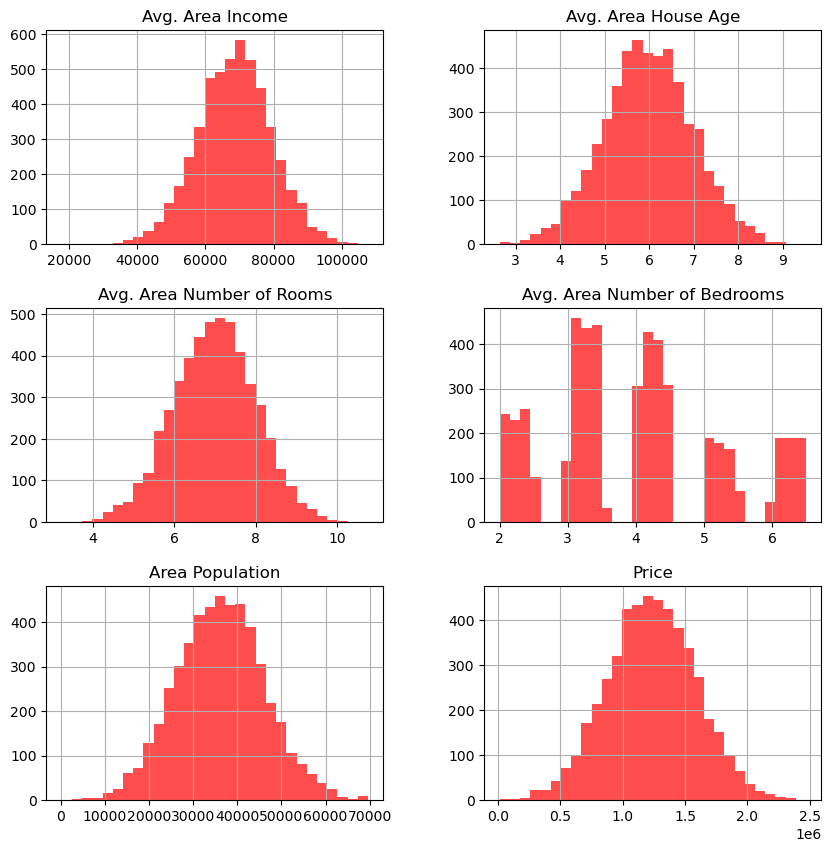

In [26]:
data.hist(figsize=(10, 10), bins=30, color='r', alpha=0.7)
plt.show()


<Axes: >

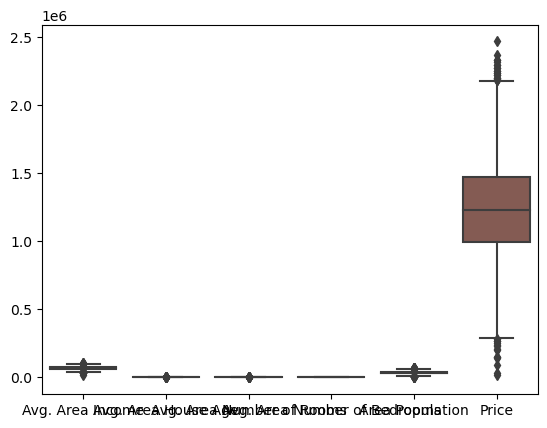

In [27]:
sns.boxplot(data)


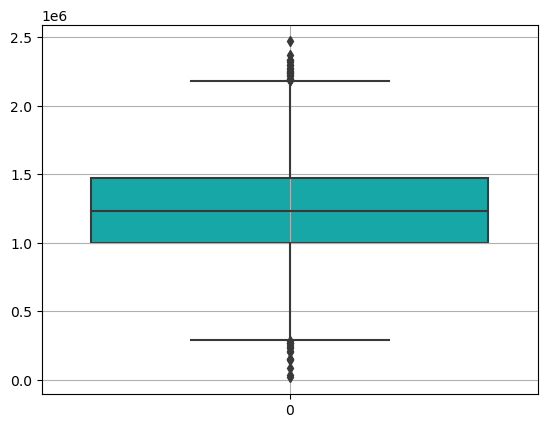

In [30]:
sns.boxplot(data['Price'], color='c')
plt.grid()

In [66]:
data[(data['Price'] < 400000 )|(data['Price'] > 2200000) ]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
90,48904.983269,4.844973,5.448956,3.38,32960.753070,2.018981e+05,"2124 Garcia Viaduct\nNorth Kellytown, DC 30864"
110,55472.654827,4.822147,5.855972,3.20,15353.956429,3.406052e+05,"91111 Crane Spur\nKathleenmouth, ME 43022-3191"
256,91159.418327,6.536045,7.373851,3.01,54861.091097,2.298379e+06,"170 Smith Wall\nSouth Christopherhaven, AZ 87521"
263,40366.616291,4.902940,7.617118,5.07,16349.365394,1.520719e+05,"503 Howard Pass Apt. 427\nFernandezborough, GA..."
...,...,...,...,...,...,...,...
4715,45914.204003,5.985710,5.799201,3.00,32699.195015,3.784664e+05,"9495 Arias Valley Apt. 493\nPaulberg, WA 71154"
4729,51634.798046,5.417914,4.891430,3.16,18998.855157,3.344852e+05,"882 Tyrone Via\nStewartton, OH 41489-9900"
4733,50005.274446,4.266668,6.546822,4.30,26145.517866,3.042393e+05,"PSC 9213, Box 0445\nAPO AP 22996"
4744,39653.770031,5.205089,6.951617,2.32,40275.599326,3.959013e+05,"58979 Jimmy Place Apt. 907\nEast Bryanbury, MN..."


In [67]:
price=data[(data['Price'] < 400000 )|(data['Price'] > 2200000) ].index
for i in price:
 print(i)


39
90
110
256
263
269
355
437
465
622
693
696
715
825
901
924
1107
1141
1248
1259
1271
1354
1356
1459
1516
1536
1578
1592
1601
1628
1661
1727
1799
2017
2300
2517
2538
2656
2719
2756
2959
2963
3010
3089
3091
3212
3223
3570
3619
3744
3787
3922
4182
4310
4375
4400
4451
4589
4715
4729
4733
4744
4855


In [68]:
len(price)

63

In [69]:
data[(data['Price'] < 400000 )|(data['Price'] > 2200000) ].index

Index([  39,   90,  110,  256,  263,  269,  355,  437,  465,  622,  693,  696,
        715,  825,  901,  924, 1107, 1141, 1248, 1259, 1271, 1354, 1356, 1459,
       1516, 1536, 1578, 1592, 1601, 1628, 1661, 1727, 1799, 2017, 2300, 2517,
       2538, 2656, 2719, 2756, 2959, 2963, 3010, 3089, 3091, 3212, 3223, 3570,
       3619, 3744, 3787, 3922, 4182, 4310, 4375, 4400, 4451, 4589, 4715, 4729,
       4733, 4744, 4855],
      dtype='int64')

In [70]:
data.shape

(5000, 7)

In [92]:
df = data.drop(index=[ 39,   90,  110,  256,  263,  269,  355,  437,  465,  622,  693,  696,
        715,  825,  901,  924, 1107, 1141, 1248, 1259, 1271, 1354, 1356, 1459,
       1516, 1536, 1578, 1592, 1601, 1628, 1661, 1727, 1799, 2017, 2300, 2517,
       2538, 2656, 2719, 2756, 2959, 2963, 3010, 3089, 3091, 3212, 3223, 3570,
       3619, 3744, 3787, 3922, 4182, 4310, 4375, 4400, 4451, 4589, 4715, 4729,
       4733, 4744, 4855], axis=0)

In [93]:
df.shape

(4937, 7)

In [94]:
df



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


<Axes: >

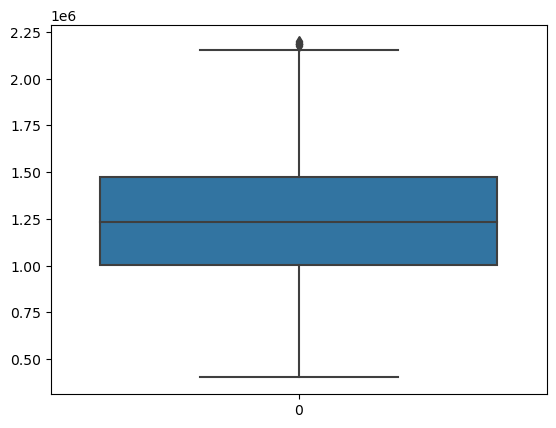

In [74]:
sns.boxplot(df['Price'])

<Axes: >

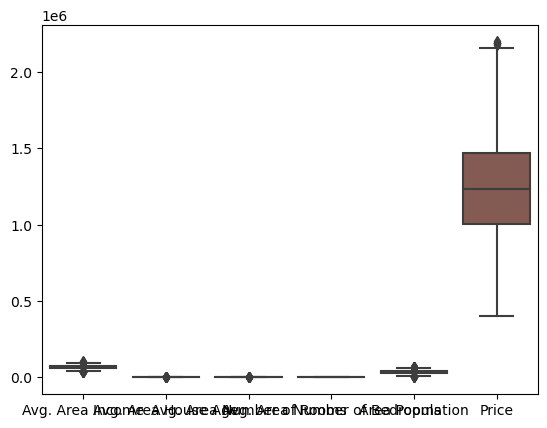

In [75]:
sns.boxplot(df)

# Checking the Correlation


In [77]:
data.select_dtypes(include=np.number).columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [87]:
df1 = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [140]:
df1.corr()['Price']


Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

In [141]:
print(df.corr()['Price'])

Avg. Area Income                0.621818
Avg. Area House Age             0.437733
Avg. Area Number of Rooms       0.320080
Avg. Area Number of Bedrooms    0.161134
Area Population                 0.395509
Price                           1.000000
Name: Price, dtype: float64


<Axes: >

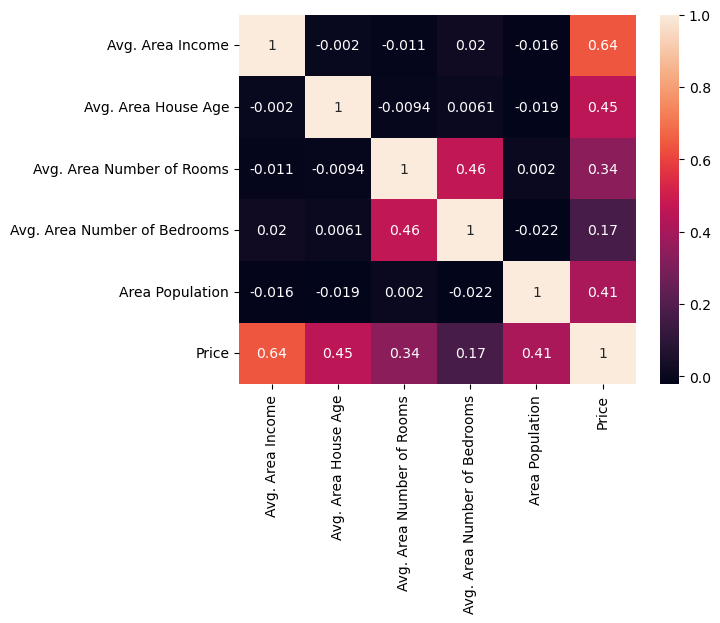

In [80]:
sns.heatmap(df1.corr(), annot=True)

In [82]:
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [83]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [134]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [89]:
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [95]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# model Traning 

In [142]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [96]:
data[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [97]:
 X= data.iloc[:,1:]
X

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [98]:
df.drop(['Address'], axis=1, inplace=True)


In [99]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [146]:
X = df.iloc[:,0:5]
X


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [147]:
y = df.loc[:, 'Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4937, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2265,63748.242480,6.251425,8.535923,6.21,47926.408018
1132,85631.084458,5.624841,8.783750,4.40,42811.781595
4680,62991.436699,7.012358,7.123990,4.37,22993.790469
1978,61687.869796,5.418325,7.334992,3.48,34760.760268
1571,77785.192610,4.254128,5.865544,2.09,43301.325964
...,...,...,...,...,...
4483,55707.353823,4.416729,6.756376,4.25,22588.577538
475,67461.446227,4.891103,8.002543,3.04,34573.112177
3137,63342.291459,5.594226,8.166272,3.19,31726.668476
3823,68751.083255,4.979128,7.380271,6.10,25504.960316


In [111]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2005,64494.479764,6.058062,7.528962,3.44,29404.067583
4624,67465.995615,4.597389,7.391640,6.19,22714.469059
154,79412.835472,6.087360,7.481321,3.26,17568.733761
2458,43795.307534,6.451642,7.881138,6.50,48114.024014
1435,53763.528011,7.336375,7.533219,5.15,32306.668519
...,...,...,...,...,...
4748,80182.093025,3.738593,9.654556,3.37,15090.851186
1180,72695.115137,5.363777,6.871980,4.24,48115.420780
1653,67094.197072,5.346437,7.374607,4.18,30022.537173
4689,69603.229639,5.114133,8.170605,6.50,37942.613459


In [112]:
y_train

2265    1.589431e+06
1132    1.710612e+06
4680    1.066280e+06
1978    9.919341e+05
1571    1.129409e+06
            ...     
4483    6.767387e+05
475     1.053815e+06
3137    1.181663e+06
3823    1.116352e+06
874     8.969442e+05
Name: Price, Length: 3949, dtype: float64

In [113]:
y_test

2005    1.048302e+06
4624    8.634484e+05
154     1.383031e+06
2458    1.020861e+06
1435    1.219847e+06
            ...     
4748    1.223261e+06
1180    1.394971e+06
1653    1.202993e+06
4689    1.299674e+06
3218    1.243839e+06
Name: Price, Length: 988, dtype: float64

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [117]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [118]:
len(y_train_pred), len(y_test_pred)


(3949, 988)

In [119]:
len(y_train), len(y_test)

(3949, 988)

In [120]:
y_train

2265    1.589431e+06
1132    1.710612e+06
4680    1.066280e+06
1978    9.919341e+05
1571    1.129409e+06
            ...     
4483    6.767387e+05
475     1.053815e+06
3137    1.181663e+06
3823    1.116352e+06
874     8.969442e+05
Name: Price, Length: 3949, dtype: float64

In [121]:
y_train_pred

array([1541849.98972342, 1854798.80526073, 1102297.88751027, ...,
       1129448.40074603,  962956.22679887, 1043767.99258326])

In [122]:
y_test


2005    1.048302e+06
4624    8.634484e+05
154     1.383031e+06
2458    1.020861e+06
1435    1.219847e+06
            ...     
4748    1.223261e+06
1180    1.394971e+06
1653    1.202993e+06
4689    1.299674e+06
3218    1.243839e+06
Name: Price, Length: 988, dtype: float64

In [123]:
y_test_pred


array([1120076.44998483,  832045.98316941, 1259272.61204414,
       1073585.17306731, 1149418.5168139 , 1732208.52135307,
       1424830.96055285,  724279.57874259, 1204716.52116426,
       1125523.96036538,  975694.33304617, 1643464.24911353,
       1647149.72297043, 1113650.13349884, 1515352.00653071,
        889881.05536201, 1662910.21969286,  973100.74986274,
        962724.16735492, 1083376.46090291,  964331.43723749,
       1271694.67927189, 1224651.62988842, 1539000.47769653,
       1099458.94221924, 1124796.45457321, 1344138.2068062 ,
       1104922.32936615, 1084202.829693  , 1709784.5249424 ,
       1679202.81836966, 1060743.41714046, 1294016.86412674,
        977220.24154376,  576794.60153027, 1097039.15044654,
       1053862.40744644, 1791216.09578912, 1173212.13193672,
       1340475.07589715, 1564038.43251408, 1052467.925499  ,
        874074.0401562 , 1548168.87466947, 1055890.18724279,
        860501.52962095,  875854.33822074, 1267306.38731403,
       1205739.66637867,

In [124]:
model.coef_


array([2.13858399e+01, 1.64734521e+05, 1.19180022e+05, 2.30807732e+03,
       1.50885849e+01])

In [125]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
coeff


,Coefficients
Avg. Area Income,21.385840
Avg. Area House Age,164734.521226
Avg. Area Number of Rooms,119180.021994
Avg. Area Number of Bedrooms,2308.077322
Area Population,15.088585


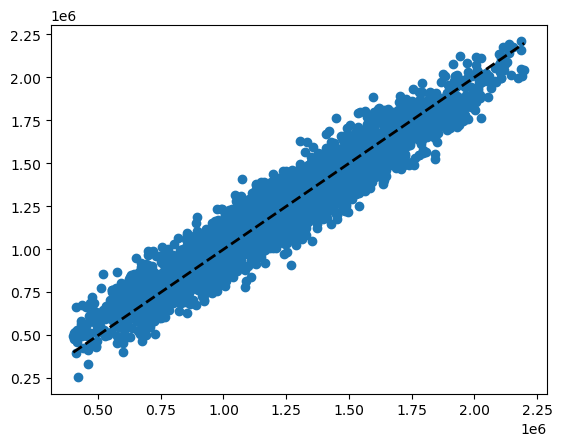

In [126]:
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

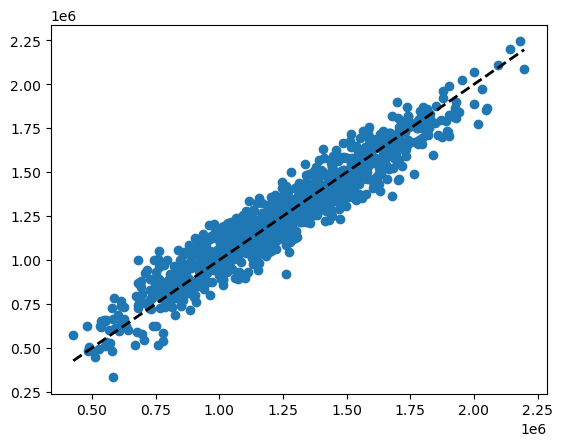

In [127]:
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)


In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Traning Evalution 

In [129]:
def train_evaluate(actual, predicted):
 
 mse = mean_squared_error(actual, predicted),
 rmse = np.sqrt(mean_squared_error(actual, predicted)),
 mae = mean_absolute_error(actual, predicted),
 r2 = r2_score(actual, predicted),
 
 print(f'MSE: {mse}')
 print(f'RMSE: {rmse}') 
 print(f'MAE: {mae}') 
 print(f'Accuracy: {r2}') 

In [130]:
train_evaluate(y_train, y_train_pred)

MSE: (10205174980.447962,)
RMSE: (101020.66610574276,)
MAE: (81300.90738775865,)
Accuracy: (0.9117966146576366,)


# Test Evaluation

In [132]:
def test_evaluate(actual, predicted):
 
 mse = mean_squared_error(actual, predicted),
 rmse = np.sqrt(mean_squared_error(actual, predicted)),
 mae = mean_absolute_error(actual, predicted),
 r2 = r2_score(actual, predicted),
 
 print(f'MSE: {mse}')
 print(f'RMSE: {rmse}') 
 print(f'MAE: {mae}') 
 print(f'Accuracy: {r2}') 


In [133]:
test_evaluate(y_test, y_test_pred)

MSE: (9994971874.1837,)
RMSE: (99974.85620986759,)
MAE: (80483.42617639992,)
Accuracy: (0.9073881293119705,)
